# **Food Delivery Cost and Profitability Analysis**

Now, let’s get started with the task of Food Delivery Cost and Profitability Analysis by importing the necessary Python libraries and the dataset:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
food_orders = pd.read_csv('Food-Orders.csv')
print(food_orders.head())

   Order ID Customer ID Restaurant ID  Order Date and Time  \
0         1       C8270         R2924  2024-02-01 01:11:52   
1         2       C1860         R2054  2024-02-02 22:11:04   
2         3       C6390         R2870  2024-01-31 05:54:35   
3         4       C6191         R2642  2024-01-16 22:52:49   
4         5       C6734         R2799  2024-01-29 01:19:30   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0    2024-02-01 02:39:52         1914             0       Credit Card   
1    2024-02-02 22:46:04          986            40    Digital Wallet   
2    2024-01-31 06:52:35          937            30  Cash on Delivery   
3    2024-01-16 23:38:49         1463            50  Cash on Delivery   
4    2024-01-29 02:48:30         1992            30  Cash on Delivery   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150                      47   
1                  10%             198                  

In [ ]:
print(food_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB
None


The dataset contains 1,000 entries and 12 columns, with no missing values in any of the columns. Now, we need to perform some data cleaning and preparation.

Convert “Order Date and Time” and “Delivery Date and Time” to a datetime format.

In [ ]:
from datetime import datetime

# convert date and time columns to datetime
food_orders['Order Date and Time'] = pd.to_datetime(food_orders['Order Date and Time'])
food_orders['Delivery Date and Time'] = pd.to_datetime(food_orders['Delivery Date and Time'])
print(food_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    815 non-null    object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

In [ ]:
# Check the shape of the dataset
print(food_orders.shape)

(1000, 12)


In [ ]:
# Check for missing values
food_orders.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [ ]:
# Check for duplicates
food_orders.duplicated().sum()

0

No duplicates Found.

# **Cost and Profitability Analysis**
For the cost analysis, we’ll consider the following costs associated with each order:

Delivery Fee: The fee charged for delivering the order.
Payment Processing Fee: The fee for processing the payment.
Discount Amount: The discount provided on the order.
We’ll calculate the total cost for the platform per order and then aggregate this data to understand the overall cost structure.

Let’s proceed with the cost and profitability analysis:

In [ ]:
# calculate total costs and revenue per order
food_orders['Total Costs'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee']
food_orders['Revenue'] = food_orders['Commission Fee']

# aggregate data to get overall metrics
total_orders = food_orders.shape[0]
total_revenue = food_orders['Revenue'].sum()
total_costs = food_orders['Total Costs'].sum()

overall_metrics = {"Total Orders": total_orders, "Total Revenue": total_revenue, "Total Costs": total_costs,}

print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 58452}


To better understand the distribution of costs, revenue, and profit, let’s plot:

A histogram of profits per order to visualize the distribution of profitable and unprofitable orders.
A pie chart to visualize the proportion of total costs (delivery fees, payment processing fees, and discounts).
A bar chart to compare total revenue, total costs, and total profit

Let’s plot the histogram first:



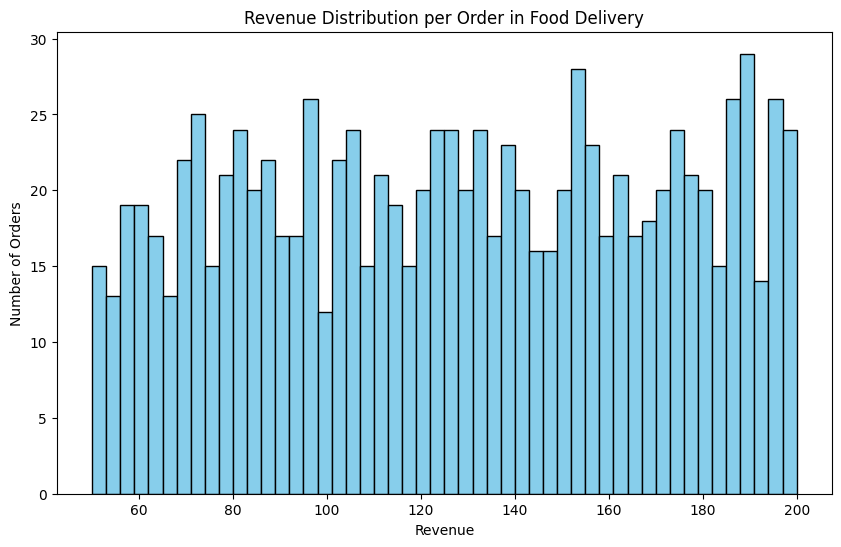

In [ ]:
import matplotlib.pyplot as plt

# histogram of profits per order
plt.figure(figsize=(10, 6))
plt.hist(food_orders['Revenue'], bins=50, color='skyblue', edgecolor='black')
plt.title('Revenue Distribution per Order in Food Delivery')
plt.xlabel('Revenue')
plt.ylabel('Number of Orders')
plt.show()

The histogram shows a wide distribution of revenue per order.

Now, let’s have a look at the proportion of total costs:


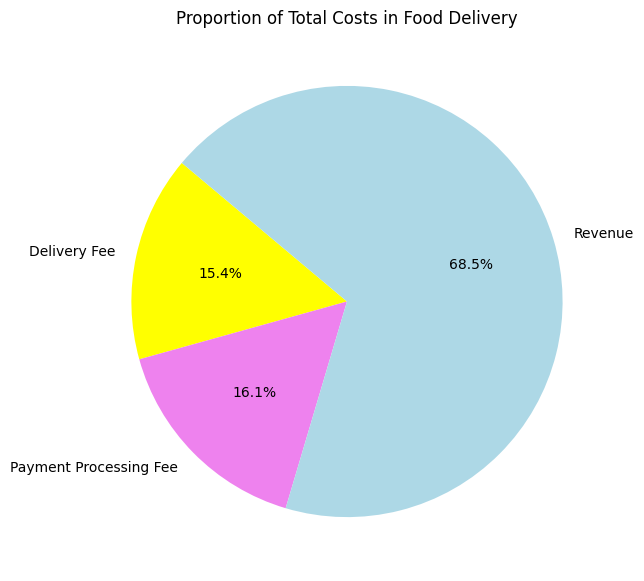

In [ ]:
# pie chart for the proportion of total costs
costs_breakdown = food_orders[['Delivery Fee', 'Payment Processing Fee', 'Revenue']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['yellow', 'violet', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

The pie chart illustrates the breakdown of total costs into delivery fees, payment processing fees, and  amounts.

Now, let’s compare total revenue, and total costs.

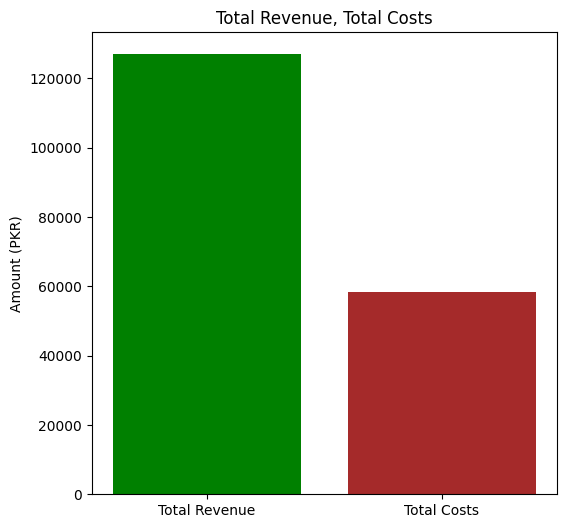

In [ ]:
# bar chart for total revenue, costs, and profit
totals = ['Total Revenue', 'Total Costs']
values = [total_revenue, total_costs]

plt.figure(figsize=(6, 6))
plt.bar(totals, values, color=['green', 'brown'])
plt.title('Total Revenue, Total Costs')
plt.ylabel('Amount (PKR)')
plt.show()

The bar chart compares total revenue, total costs.

Let us plot the scatter plot for target variable vs. predictor variables in a single plot to get the intuition.

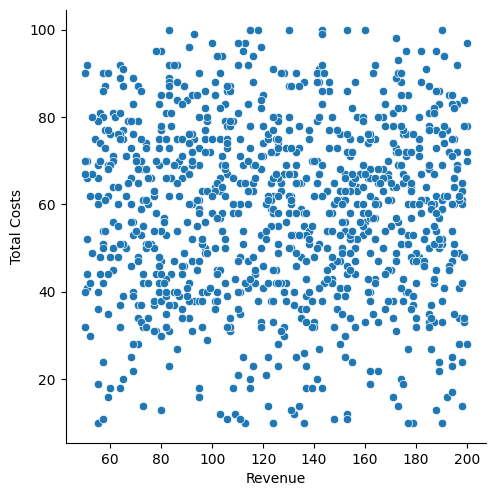

In [ ]:
sns.pairplot(food_orders, x_vars= 'Revenue' , y_vars = 'Total Costs', height = 5, kind = 'scatter' )
plt.show()

In [ ]:
X = food_orders[ 'Revenue' ]
y = food_orders[ 'Total Costs' ]

And after assigning the variables you need to split our variable into training and testing sets. You’ll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

Before feeding our data into the machine learning model, we need to convert our pandas DataFrames or Series into NumPy arrays and reshape them to meet the expected input format of the algorithms. This step is critical for ensuring the data fits the requirements of scikit-learn's estimators.

In [ ]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [ ]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(700, 1)
(300, 1)
(700, 1)
(300, 1)


In this section, we focus on the implementation of a Linear Regression model using scikit-learn, a popular machine learning library in Python.

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

In this part of the project, we visualize the performance of our trained Linear Regression model on the test set. The following code creates a scatter plot of the actual test set values and overlays it with the regression line obtained from the training set predictions.

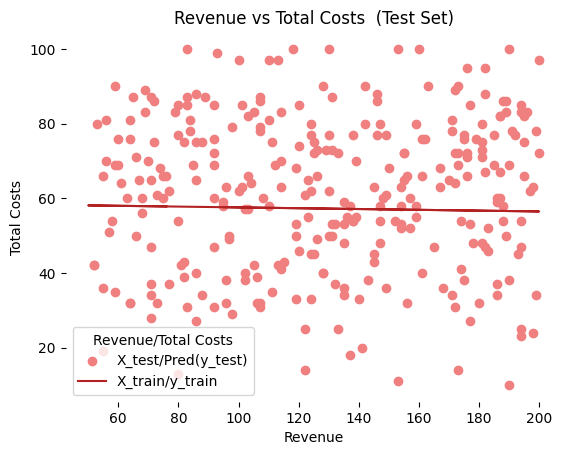

In [ ]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train,y_pred_train, color = 'firebrick')
plt.title('Revenue vs Total Costs  (Test Set)')
plt.xlabel('Revenue')
plt.ylabel('Total Costs')
plt.legend(['X_test/Pred(y_test)', 'X_train/y_train'], title = 'Revenue/Total Costs', facecolor='white')
plt.box(False)
plt.show()

In this section, we evaluate the accuracy of our trained Linear Regression model using the R-squared (R²) metric, which measures how well the model's predictions match the actual data. By calculating and displaying the R² score, we gain insight into the model's performance. This metric is crucial for understanding the effectiveness of our regression model in predicting the target variable based on the input features.

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is -4.0%


In this section, we evaluate the performance of our trained Linear Regression model using the Mean Squared Error (MSE) metric, which provides a measure of the average squared difference between the actual and predicted values. We then take the square root of the MSE to obtain the Root Mean Squared Error (RMSE), which brings the error metric back to the original scale of the data.

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
score = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("The Mean Squared Error of our Model is {}".format(round(score, 2)))

The Mean Squared Error of our Model is 20.75
